In [1]:
import sklearn
sklearn.__version__

'1.0.2'

# 1. Linear Regression
### 1.1 공부시간에 따른 시험 점수

In [2]:
# https://www.youtube.com/watch?v=TNcfJHajqJY&list=PLMsa_0kAjjrd8hYYCwbAuDsXZmHpqHvlV&index=8
# 모두의 책
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('..\SampleData\Youtube\LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [4]:
X=dataset.iloc[:, :-1].values   # [row, col]
Y=dataset.iloc[:,  -1].values
X, Y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

### 1.2 Linear 모델

In [5]:
from sklearn.linear_model import LinearRegression

# 모델 생성
reg=LinearRegression()
reg.fit(X, Y)

LinearRegression()

In [6]:
Y_pred=reg.predict(X)   # X에 대한 예측 값
Y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

### 1.3 데이터 시각화

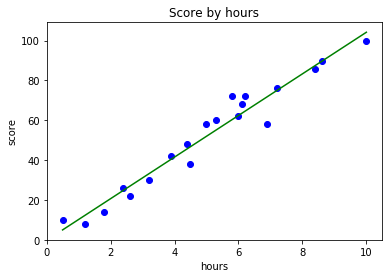

In [7]:
plt.scatter(X, Y, color='blue')             # 산점도
plt.plot(X, Y_pred, color="green")          # 선그리기
plt.title("Score by hours")                 # 제목
plt.xlabel("hours")                         # X축 이름
plt.ylabel("score")                         # Y축 이름
plt.show()

In [8]:
reg.predict([[9]])             # 9시간 공부했을 때 예상 점수 / reg.predict([[9], [8], [7]])

array([93.77478776])

In [9]:
reg.coef_                   # 기울기

array([10.44369694])

In [10]:
reg.intercept_              # y절편

-0.218484702867201

In [11]:
# y=mx+b
# y=10.4436 * 9 - 0.2184

### 1.4 데이터 세트 분리

In [12]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [13]:
X=dataset.iloc[:, :-1].values
Y=dataset.iloc[:, -1].values
X, Y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=0)   # 80:20

In [16]:
print(len(X))
print(len(X_train))
print(len(X_test))

20
16
4


In [17]:
print(len(Y))
print(len(Y_train))
print(len(Y_test))

20
16
4


In [18]:
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

#### 가. 데이터 시각화(train set)

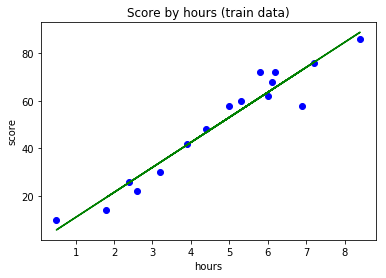

In [19]:
plt.scatter(X_train, Y_train, color="blue")     # 산점도
plt.plot(X_train, model.predict(X_train), color='green')    # 선그래프
plt.title("Score by hours (train data)")         # 제목
plt.xlabel("hours")                             # X축 이름
plt.ylabel("score")                             # Y축 이름
plt.show()

#### 나. 데이터 시각화(test set)

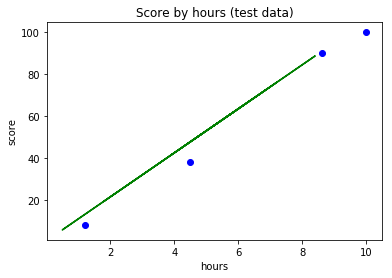

In [20]:
plt.scatter(X_test, Y_test, color="blue")
plt.plot(X_train, model.predict(X_train), color='green')
plt.title("Score by hours (test data)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [21]:
model.coef_      # 기울기

array([10.49161294])

In [22]:
model.intercept_    # Y절편

0.6115562905169796

#### 다. 모델평가

In [23]:
model.score(X_test, Y_test)       # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [24]:
model.score(X_train, Y_train)

0.9356663661221668

#### 라. 경사하강법(Gradient Descent)

In [25]:
from sklearn.linear_model import SGDRegressor    # SGD : Stochastic Gradient Descent 확률적 경사 하강법

* max_iter : 훈련 세트 반복 횟수(Epoch 횟수)
* eta0 : 학습률 / learning rate
    * 1e-3 : 0.001 / 10^-3
    * 1e-4 : 0.0001 / 10^-4
    * 1e+3 : 1000 / 10^3
    * 1e+4 : 10000 / 10^4

In [26]:
model=SGDRegressor()  # defult

# model=SGDRegressor(max_iter=150, eta0=0.0001, random_state=1234, verbose=1)     # verbose 사용하면 학습륟등등 다 출력
# model=SGDRegressor(max_iter=200, eta0=0.0001, random_state=1234)    
model.fit(X_train, Y_train)

SGDRegressor()

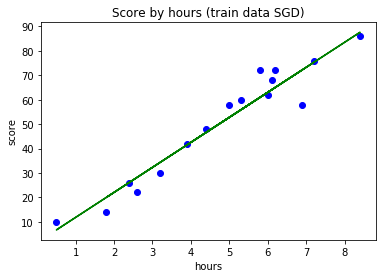

In [27]:
plt.scatter(X_train, Y_train, color="blue")     # 산점도
plt.plot(X_train, model.predict(X_train), color='green')    # 선그래프
plt.title("Score by hours (train data SGD)")         # 제목
plt.xlabel("hours")                             # X축 이름
plt.ylabel("score")                             # Y축 이름
plt.show()

In [28]:
model.coef_ , model.intercept_  

(array([10.24909386]), array([1.53560256]))

In [29]:
model.score(X_test, Y_test)

0.9747348906052817

In [30]:
model.score(X_train, Y_train)    # 대략 훈련세트가 좋다.

0.9350709096923441

# 2. Multiple Linear Regression
* Multicollinearity (다중공선성)
    * 독립 변수들 간에 서로 강한 상관관계를 가지면서 회귀계수 추정의 오류가 나타나는 문제, 하나의 피처가 다른 피처에 영향을 미침
    * D1+D2+D3=항상 1이다. 예) 100, 010, 001
    * D3=1-(D1+D2)
    * 즉, Dummy Column이 n개면? n-1 개만 사용 = Dummy variable trap

In [31]:
dataset=pd.read_csv('..\SampleData\Youtube\MultipleLinearRegressionData.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hour    20 non-null     float64
 1   absent  20 non-null     int64  
 2   place   20 non-null     object 
 3   score   20 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 768.0+ bytes


In [32]:
dataset.head()

,hour,absent,place,score
0,0.5,3,Home,10
1,1.2,4,Library,8
2,1.8,2,Cafe,14
3,2.4,0,Cafe,26
4,2.6,2,Home,22


In [33]:
dataset[['hour', 'absent', 'place']].head()

,hour,absent,place
0,0.5,3,Home
1,1.2,4,Library
2,1.8,2,Cafe
3,2.4,0,Cafe
4,2.6,2,Home


In [34]:
X=dataset.iloc[:, :-1].values
Y=dataset.iloc[:, -1].values

In [35]:
X, Y

(array([[0.5, 3, 'Home'],
        [1.2, 4, 'Library'],
        [1.8, 2, 'Cafe'],
        [2.4, 0, 'Cafe'],
        [2.6, 2, 'Home'],
        [3.2, 0, 'Home'],
        [3.9, 0, 'Library'],
        [4.4, 0, 'Library'],
        [4.5, 5, 'Home'],
        [5.0, 1, 'Cafe'],
        [5.3, 2, 'Cafe'],
        [5.8, 0, 'Cafe'],
        [6.0, 3, 'Library'],
        [6.1, 1, 'Cafe'],
        [6.2, 1, 'Library'],
        [6.9, 4, 'Home'],
        [7.2, 2, 'Cafe'],
        [8.4, 1, 'Home'],
        [8.6, 1, 'Library'],
        [10.0, 0, 'Library']], dtype=object),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

### 2.1 One-Hot-Encoding

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [37]:
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [2])], remainder='passthrough')    # 다중공선상(drop='첫번째'),[2번지], 다른번지는빼고 
X=ct.fit_transform(X)
X

# 1 0 : Home 
# 0 1 : Libary
# 0 0 : Cafe

array([[1.0, 0.0, 0.5, 3],
       [0.0, 1.0, 1.2, 4],
       [0.0, 0.0, 1.8, 2],
       [0.0, 0.0, 2.4, 0],
       [1.0, 0.0, 2.6, 2],
       [1.0, 0.0, 3.2, 0],
       [0.0, 1.0, 3.9, 0],
       [0.0, 1.0, 4.4, 0],
       [1.0, 0.0, 4.5, 5],
       [0.0, 0.0, 5.0, 1],
       [0.0, 0.0, 5.3, 2],
       [0.0, 0.0, 5.8, 0],
       [0.0, 1.0, 6.0, 3],
       [0.0, 0.0, 6.1, 1],
       [0.0, 1.0, 6.2, 1],
       [1.0, 0.0, 6.9, 4],
       [0.0, 0.0, 7.2, 2],
       [1.0, 0.0, 8.4, 1],
       [0.0, 1.0, 8.6, 1],
       [0.0, 1.0, 10.0, 0]], dtype=object)

### 2.2 데이터 세트 분리

In [38]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=0)

In [39]:
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

#### 가. 예측값과 실제값 비교 (테스트 세트)

In [40]:
y_pred=model.predict(X_test)    # 예측값
y_pred

array([ 92.15457859,  10.23753043, 108.36245302,  38.14675204])

In [41]:
Y_test                          # 실제값

array([ 90,   8, 100,  38], dtype=int64)

In [42]:
model.coef_               

array([-5.82712824, -1.04450647, 10.40419528, -1.64200104])

* -5.82712824  : 집     >> 집에서 공부할때 성적 나쁨
* -1.04450647  : 도서관
*  0           : 카페    >> 카페에서 공부하는 제일 성적 오름

*  10.40419528  : 공부시간 1시간마다 점수 오르고
* -1.64200104   : 결석할때 -1.7 점수가 감소

In [43]:
model.intercept_

5.365006706544804

### 2.3 모델 평가

In [44]:
model.score(X_train, Y_train)   # 훈련

0.9623352565265527

In [45]:
model.score(X_test, Y_test)     # 테스트

0.9859956178877447

### 2.4 다양한 평가 지표
* MAE(Mean Absolute Error) : (실제값과 예측값) 차이의 절대값
* MSE(Mean Squared Error) : (실제값과 예측값) 차이의 제곱
* RMSE(Root Mean Squared Error) : (실제값과 예측값) 차이의 제곱에 루트
* R2 : 결정 계수


* R2는 1에 가까울수록, 나머지는 0에 가까울수록 좋음

In [46]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, y_pred)    # MAE(Mean Absolute Error) : (실제값과 예측값) 차이의 절대값

3.225328518828788

In [47]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_pred)                   # MSE(Mean Squared Error) : (실제값과 예측값) 차이의 제곱

19.90022698151473

In [48]:
mean_squared_error(Y_test, y_pred, squared=False)     #제곱하지 말라   # RMSE(Root Mean Squared Error) : (실제값과 예측값) 차이의 제곱에 루트

4.460967045553546

In [49]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred)

0.9859956178877447

# 3. Polynomial Regression (다항회귀)
* https://arachnoid.com/polysolve/ - 구글 검색 Polynomial Regression Data fit

* 공부 시간에 따른 시험 점수(우등생)

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
dataset=pd.read_csv('..\SampleData\Youtube\PolynomialRegressionData.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hour    20 non-null     float64
 1   score   20 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes


In [52]:
X=dataset.iloc[:, :-1].values
Y=dataset.iloc[:, -1].values
X, Y

(array([[0.2],
        [0.5],
        [0.8],
        [0.9],
        [1.2],
        [2.4],
        [2.5],
        [2.6],
        [2.9],
        [3.1],
        [3.2],
        [3.3],
        [3.7],
        [3.9],
        [4. ],
        [4.1],
        [4.2],
        [4.4],
        [4.7],
        [4.8]]),
 array([  2,   4,   6,   4,   6,  14,  10,  12,  24,  26,  32,  46,  44,
         52,  58,  54,  68,  80,  84, 100], dtype=int64))

### 2.1 단순 선형 회귀

In [53]:
model=LinearRegression()
model.fit(X, Y)

LinearRegression()

#### 가. 데이터 시각화 (전체)

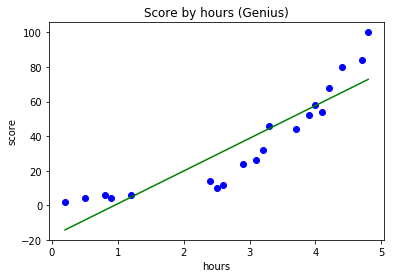

In [54]:
plt.scatter(X, Y, color="blue")          # 산점도
plt.plot(X, model.predict(X), color="green")   # 선 그래프
plt.title("Score by hours (Genius)")   # 제목
plt.xlabel("hours")   # X축 이름
plt.ylabel("score")   # Y축 이름
plt.show()

In [55]:
model.score(X, Y)

0.8169296513411765

### 2.2 다항 회귀
* sklearn 다항 회귀를 클래스 제공하지 않는다. 

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
model=PolynomialFeatures(degree=2)    # 2차
# model.fit()
# model.fit_transform(X)

X_ploy=model.fit_transform(X)
X_ploy[:5]    # [x] --> [x^0, x^1, x^3]  변환

array([[1.  , 0.2 , 0.04],
       [1.  , 0.5 , 0.25],
       [1.  , 0.8 , 0.64],
       [1.  , 0.9 , 0.81],
       [1.  , 1.2 , 1.44]])

In [58]:
X[:5]    # 2:09

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])